## Project Wrangling/EDA
For this project, we'll be using the ***Spotify Tracks Dataset*** from Kaggle: 
- https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

This dataset has numerically evaluated variables that are connected to various parts of a song. Let's take a look at the data!

In [4]:
import pandas as pd

# Loading in the Data
spotify_data = pd.read_csv("data/spotify_data.csv")

# Finding Out Information
print(spotify_data.shape)
print(spotify_data.columns)
print(spotify_data.head(5))

(114000, 21)
Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion P

Immediately we see 'Unnamed: 0'. This column likely comes from downloading the data from Kaggle, so let's get rid of it to avoid later problems. It may act as a general identifier, but we already have 'track_id' as a variable, so we don't need to double down. 

In [ ]:
spotify_data = spotify_data.drop(columns=["Unnamed: 0"])

# Confirming the Remove
print(spotify_data.shape)
print(spotify_data.columns)
print(spotify_data.head(5))

(114000, 20)
Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')
                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   

Let's look at the NAs in each column and figure out a way to deal with them.

In [6]:
spotify_data.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Great. The good thing about using data from Kaggle is that it is likely already clean, so we can go straight into our analysis. The first thing we want to take a look at is how some of these variables are connected. Some of the variable descriptions lead me to believe they'll be pretty directly correlated. If so, we can find a way to use this to our advantage when modeling. The following variable descriptions lead me to believe this:

- **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- **loudness**: The overall loudness of a track in decibels (dB)
- **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

Our assumption is that high energy songs will also be associated with high loudness or tempo. High danceabilitiy takes into account temp meaning it'll also have a high tempo. Let's plot these variables against each other and see what we get.

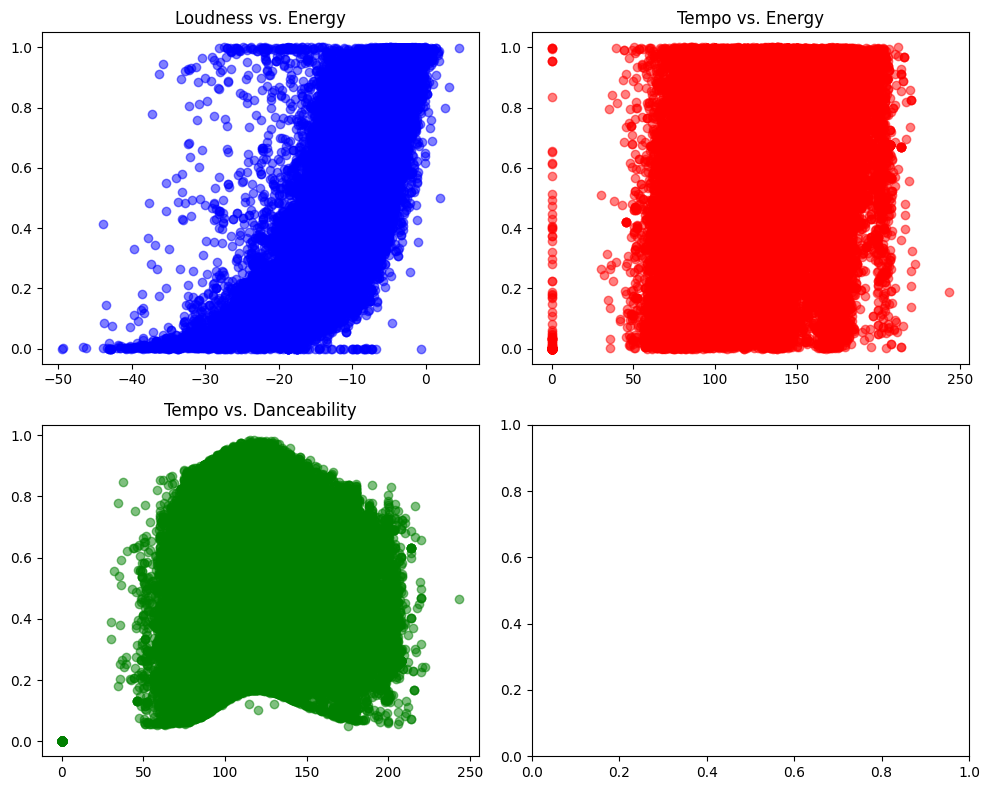

In [ ]:
import matplotlib.pyplot as plt

# Creating a Space for 3 Different Subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Loudness vs. Energy
axes[0, 0].scatter(spotify_data["loudness"], spotify_data["energy"], alpha=0.5, color='b')  
axes[0, 0].set_title("Loudness vs. Energy")

# Tempo vs. Energy
axes[0, 1].scatter(spotify_data["tempo"], spotify_data["energy"], alpha=0.5, color='r')  
axes[0, 1].set_title("Tempo vs. Energy")

# Tempo vs. Danceability
axes[1, 0].scatter(spotify_data["tempo"], spotify_data["danceability"], alpha=0.5, color='g')  
axes[1, 0].set_title("Tempo vs. Danceability")

plt.tight_layout()
plt.show()

Safe to say our assumption was wrong which is good. We'll be able to use the data independently. We may get into a linear relationship when looking at 'loudness' and 'energy' or a negative parabolic relationship with 'tempo' and 'danceability', but let's move on. Let's see if there is  connection between 'track_genre' and 'popularity'. We may find an issue where Spotify is leaning towards recommending a song more purely based on its genre. 

In [14]:
# Filtering Songs with a Popularity Score Over 75
genre_counts = spotify_data[spotify_data["popularity"] > 75]["track_genre"].value_counts()
print("Top 10 Genres:\n", genre_counts.head(10))
print("\nBottom 10 Genres:\n", genre_counts.tail(10))

Top 10 Genres:
 track_genre
pop            181
dance          178
rock           158
latino         120
indie          116
reggaeton      105
electro        105
house           97
indie-pop       89
alternative     87
Name: count, dtype: int64

Bottom 10 Genres:
 track_genre
industrial    2
pagode        2
metalcore     2
acoustic      2
j-dance       1
club          1
classical     1
children      1
brazil        1
turkish       1
Name: count, dtype: int64


We can see that more general genres (indie, dance, alternative) are favored and more likely to be popular than specific genres (industrial, metalcore, turkish). One could argue that acoustic is a pretty general genre, but in reality acoustic songs are tied to another genre. It could be indie, alternative, or country, but artists likely don't put their genre down as 'acoustic'. We can already see the value in this as we could recommend to artists to generalize their songs when it comes to genre selection. These genres were not autopopulated by any data, but instead submitted by the artist. 